## Model Performance Evaluation using hydroeval

- This following snippet of code (imported as an image) shows how to use the example data (in **netCDF** format)
- For simplicity, you are provided with the observed and simulated flows in a .csv file ("data_obs_sims.csv")
- You can download the original data (in netCDF format) from here: https://github.com/ThibHlln/hydroeval/tree/main/sample_data
- Take the below image as a guide and experiment on your own to run the code using netCDF data

#### This is an image showing the manipulation of netCDF data
<img src="netCDF.PNG">

#### Let's start coding!

In [12]:
# Let us load the data
import pandas as pd
data = pd.read_csv('data_obs_sims.csv')
data.head()

,Obs,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6,Sim7,Sim8,Sim9,...,Sim11,Sim12,Sim13,Sim14,Sim15,Sim16,Sim17,Sim18,Sim19,Sim20
0,4.901051,1.063771,2.007536,1.214454,2.692770,1.396070,1.844142,1.640803,0.954048,1.504389,...,0.794013,0.550339,1.748920,0.597982,1.195836,1.093881,1.551083,1.556347,1.137513,1.582958
1,4.288905,1.121907,2.105129,1.259399,2.804215,1.415336,1.951381,1.708590,0.988717,1.587766,...,0.809153,0.604028,1.796808,0.613097,1.302006,1.107714,1.554160,1.588246,1.173596,1.616097
2,4.481438,1.307203,2.287111,1.771217,2.937074,1.449701,2.099528,1.797116,1.047202,1.678548,...,0.831471,0.718370,1.863424,0.728677,1.438121,1.133653,1.560539,1.627271,1.227450,1.683875
3,7.945478,1.649455,2.670139,3.179700,3.179014,1.520323,2.426937,1.969467,1.189887,1.787724,...,0.874508,1.023334,2.004739,1.467674,1.706858,1.202565,1.576077,1.688534,1.343960,1.838314
4,4.667372,1.667106,2.772402,3.000780,3.451881,1.577254,2.687345,2.159792,1.327840,1.919744,...,0.934859,1.106226,2.145530,2.244114,2.001918,1.277795,1.596429,1.761711,1.463256,1.908583


In [13]:
data.shape

(4383, 21)

In [14]:
# Let us drop any NaNs in the data
data.dropna(inplace=True)

In [15]:
# As an exercise, let us save the observation and simulations in separate dataframes
# Separating them is not required - we are doing it for the sake of this exercise
obs = pd.DataFrame(data['Obs'])
sim = data.iloc[:,1:]

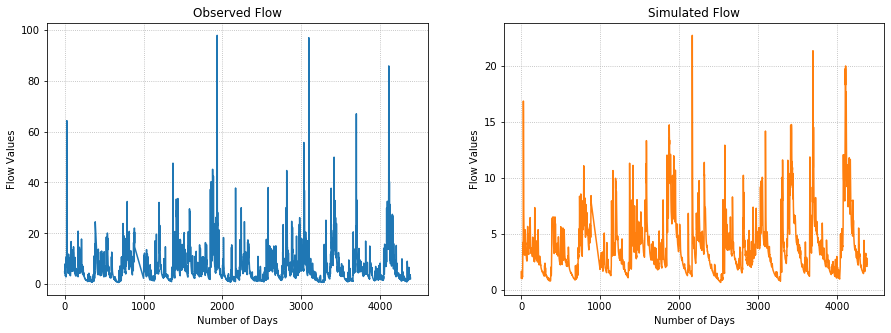

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))

# Let us visualize the observed flow
plt.subplot(121); plt.grid(linestyle=':')
plt.plot(obs['Obs'],'C0'); plt.title('Observed Flow')
plt.xlabel('Number of Days'); plt.ylabel('Flow Values');

# Let us visualize the first simulated flow
plt.subplot(122); plt.grid(linestyle=':')
plt.plot(sim['Sim1'],'C1'); plt.title('Simulated Flow')
plt.xlabel('Number of Days'); plt.ylabel('Flow Values');

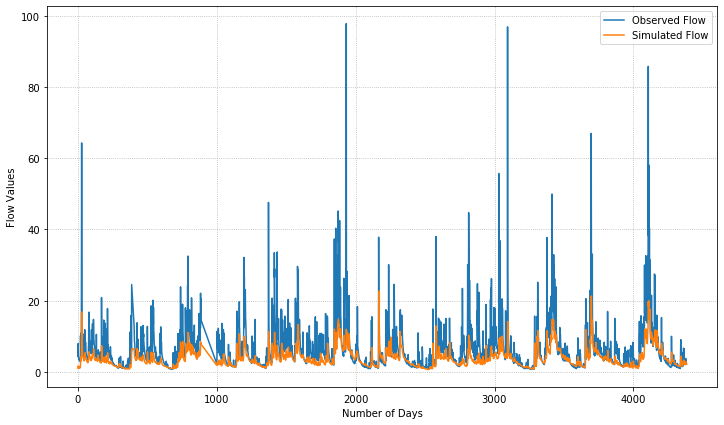

In [17]:
# Let us plot the observed flow and one of the simulated flows on the same axis
plt.figure(figsize=(12,7)); plt.grid(linestyle=':')
plt.plot(obs['Obs']); plt.plot(sim['Sim1']);
plt.xlabel('Number of Days'); plt.ylabel('Flow Values');
plt.legend(['Observed Flow','Simulated Flow']);

In [18]:
# Uncomment the following line to install hydroeval
# !python -m pip install hydroeval

In [19]:
from hydroeval import evaluator, nse
my_nse = evaluator(nse, sim, obs, axis=0)
print(my_nse.shape);print()
print(my_nse)

(20,)

[0.34650485 0.48347442 0.57372786 0.29326951 0.06721032 0.28481577
 0.27193062 0.1893216  0.18454516 0.21669699 0.04644772 0.28255908
 0.24668152 0.41708731 0.23750513 0.08981919 0.07035279 0.12854737
 0.17265806 0.12465132]


In [20]:
from hydroeval import evaluator, pbias
my_pbias = evaluator(pbias, sim, obs, axis=0)
print(my_pbias.shape);print()
print(my_pbias)

(20,)

[36.99560633 25.17760968 26.6286059  22.73219298 37.1352497  31.43248444
 32.63856331 40.16481881 33.04490641 18.91459482 40.80459424 37.69284104
 29.21642356 24.56146882 38.84919926 39.5989446  40.83678442 29.79948438
 33.96326391 36.56741868]


In [22]:
from hydroeval import evaluator, kge
my_kge = evaluator(kge, sim, obs, axis=0, transform='inv')
print(my_kge.shape); print()
print(my_kge.T)

(4, 20)

[[ 0.72655083  0.84278148  0.95663806  1.21949152]
 [ 0.69359398  0.82909218  0.7708813   1.11036209]
 [ 0.69464258  0.88615611  1.06486152  1.27581825]
 [ 0.40260502  0.76572319  0.46967716  0.85594159]
 [ 0.47684962  0.6998156   0.57169177  1.0113008 ]
 [ 0.59187061  0.82761725  0.63006345  1.00085608]
 [ 0.56981156  0.79002984  0.62745461  1.04673922]
 [ 0.66234358  0.81660368  1.03554958  1.28127189]
 [ 0.63547147  0.78430251  0.70844928  1.03679428]
 [ 0.28198986  0.72392735  0.3815258   0.76164704]
 [ 0.61524389  0.70053385  1.01819073  1.24088668]
 [ 0.27542447  0.78426454  1.55650459  1.41081693]
 [ 0.53529453  0.80312475  0.58137977  0.95585917]
 [-0.55069918  0.81030731  2.37522769  1.69096559]
 [ 0.61241551  0.82226284  1.14141181  1.31406041]
 [ 0.58463641  0.70478963  0.73041882  1.11271086]
 [ 0.39411208  0.62382061  0.53138144  1.07736856]
 [ 0.44531681  0.71886087  0.52910095  0.91700419]
 [ 0.64125871  0.77258123  0.72548847  1.04024221]
 [ 0.44407717  0.75253